In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.vision import *
from fastai.callbacks import *

In [3]:
torch.cuda.is_available()

True

In [4]:
np.random.seed(42)

In [5]:
tfms=[flip_lr(p=0.5)],[]

In [6]:
mixup=0.2

In [7]:
loss_func = LabelSmoothingCrossEntropy()

In [8]:
alpha=0.99
mom=0.9
eps=1e-6

In [9]:
opt_func = partial(optim.Adam, betas=(mom,alpha), eps=eps)

In [10]:
src = (ImageList.from_folder(path='train').split_by_rand_pct(0.2).label_from_folder())

In [11]:
data = src.transform(tfms,size=(128)).databunch(bs=512).normalize().presize(256, scale=(0.35,1))

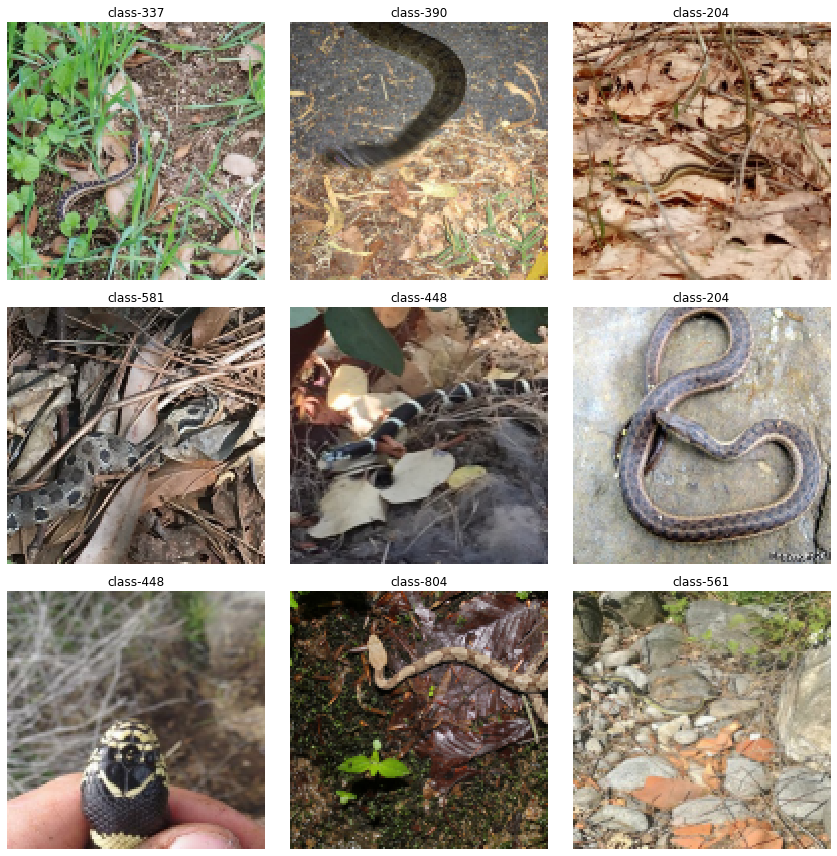

In [12]:
data.show_batch(rows=3, figsize=(12,12))


In [13]:
learn = cnn_learner(data, models.densenet121,pretrained=False, metrics=[error_rate, accuracy, FBeta(beta=1,average='macro')],loss_func = loss_func,opt_func=opt_func,wd=1e-2)

/home/ubuntu/anaconda3/envs/snakes_breed/lib/python3.6/site-packages/torchvision/models/densenet.py:212: UserWarning: nn.init.kaiming_normal is now deprecated in favor of nn.init.kaiming_normal_.
  nn.init.kaiming_normal(m.weight.data)


In [14]:
learn= learn.mixup(alpha=mixup)

In [15]:
learn.bn_wd=False

In [16]:
learn.true_wd=True

In [17]:
learn = learn.to_fp16(dynamic=True)

In [18]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


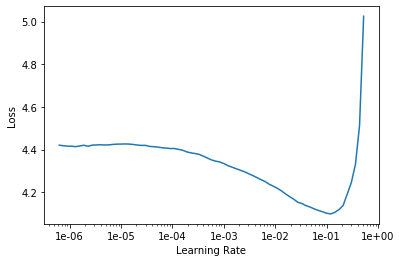

In [19]:
learn.recorder.plot()

In [20]:
learn.unfreeze()

In [21]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


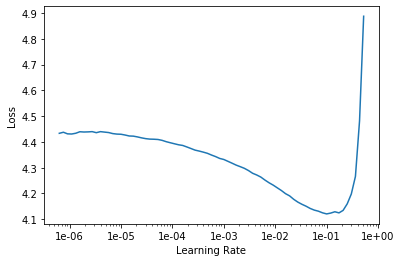

In [22]:
learn.recorder.plot()

In [23]:
lr=2.5e-2

In [24]:
learn.fit_one_cycle(80, lr, div_factor=10, pct_start=0.3)


epoch,train_loss,valid_loss,error_rate,accuracy,f_beta,time
0,3.587629,3.847623,0.838015,0.161985,0.026715,05:19
1,3.546181,4.035196,0.850270,0.149730,0.019411,05:16
2,3.483754,3.651633,0.832312,0.167688,0.025706,05:18
3,3.445275,3.372556,0.821149,0.178851,0.038931,05:16
4,3.460016,3.939216,0.855609,0.144391,0.018750,05:16
5,3.417802,3.369978,0.818358,0.181642,0.043465,05:17
6,3.350453,3.263837,0.814233,0.185767,0.051258,05:17
7,3.282295,3.414667,0.834739,0.165261,0.053698,05:18
8,3.216019,3.179177,0.776800,0.223200,0.090439,05:15
9,3.150999,3.003079,0.740945,0.259055,0.108361,05:19


In [25]:
learn.save('exp-5-round-1')

In [26]:
learn

Learner(data=ImageDataBunch;

Train: LabelList (65934 items)
x: ImageList
Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128)
y: CategoryList
class-857,class-857,class-857,class-857,class-857
Path: train;

Valid: LabelList (16483 items)
x: ImageList
Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128)
y: CategoryList
class-540,class-526,class-771,class-4,class-804
Path: train;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Sequential(
      (conv0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (norm0): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu0): ReLU(inplace)
      (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (denseblock1): _DenseBlock(
        (denselayer1): _DenseLayer(
          (norm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track